In [500]:
# 프로젝트 기획의도 -> 치솟는 물가상승률 & 떨어지는 은행 예금 이자율을 대체할 상품은 무엇인가? 
#                   -> 최종 11개의 암호화폐 선정 /  투자에 뒷받침할 데이터수집후 분석,시각화하여 비전제시 
# 사용할 템플릿틀 -> NH투자증권 https://comp.wisereport.co.kr/company/c1040001.aspx?cmp_cd=005940&cn=
# 컨텐츠 => 1. 수익성 2.성장성 3.안전성 4. 활동성

In [501]:
# 라이브러리,모듈 불러오기 / matplotlib 시각화 폰트설정 / 파이썬에서 데이터프레임 열때 옵션 설정
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family = "Malgun Gothic")

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [502]:
# 데이터불러오기 / 필요한 11개 코인 데이터로 파싱
df = pd.read_csv('complete(final).csv') # 최종수집데이터
df1 = pd.read_csv('Public Companies that Own Bitcoin.csv') # 비트코인을 소유한 공기업
df2 = pd.read_csv('Countries & Governments that Own Bitcoin.csv') # 비트코인을 보유한 국가 & 정부
df3 = pd.read_csv('Private Companies that Own Bitcoin.csv') # 비트코인을 소유한 민간 기업
df4 = pd.read_csv('ETFs that Own Bitcoin.csv') # 비트코인을 소유한 ETF

df.drop(["Unnamed: 0"],axis=1,inplace=True)
df.drop(df.index[[4,7,8,9,10,13,15,17,18,19,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51]],inplace=True)

In [503]:
# 컬럼명 조회
df.columns

Index(['Coin', 'Price', 'Price Change', '24h Low', '24h High',
       'Trading Volume', 'Volume / Market Cap', 'Market Dominance',
       'Market Rank', 'Market Cap', 'Fully Diluted Market Cap',
       'Yesterdays Low', 'Yesterdays High', 'Yesterdays Open',
       'Yesterdays Close', 'Yesterdays Change', 'Yesterdays Volume', '7d Low',
       '7d High', '30d Low', '30d High', '90d Low', '90d High', '52 Week Low',
       '52 Week High', 'All Time High', 'All Time Low', 'ROI', 'ROI_times',
       'Crirulating Supply', 'Total Supply',
       'Circulating_supply_by_total_supply\n', 'Max Supply', 'Amount',
       '%of Total Supply', 'Fundamental Crypto Asset Score', 'Invest',
       'invest_number', 'Platform', 'Category', 'Interest Rate'],
      dtype='object')

In [504]:
# 데이터 프레임 확인
df

,Coin,Price,Price Change,24h Low,24h High,Trading Volume,Volume / Market Cap,Market Dominance,Market Rank,Market Cap,Fully Diluted Market Cap,Yesterdays Low,Yesterdays High,Yesterdays Open,Yesterdays Close,Yesterdays Change,Yesterdays Volume,7d Low,7d High,30d Low,30d High,90d Low,90d High,52 Week Low,52 Week High,All Time High,All Time Low,ROI,ROI_times,Crirulating Supply,Total Supply,Circulating_supply_by_total_supply\n,Max Supply,Amount,%of Total Supply,Fundamental Crypto Asset Score,Invest,invest_number,Platform,Category,Interest Rate
0,Bitcoin,53901867.73,-632382.04,53430948.52,55497467.94,3.710000e+13,0.03665,43.50%,1,1.010000e+15,1.130000e+15,53803038.84,56508211.63,55356651.81,54161129.34,-2.16%,3.860000e+13,51638129.50,56508211.63,34566685.37,56508211.63,34016492.33,56508211.63,11674697.96,76363397.17,76363397.17,77143.83,33739.07%,338,1.878908e+07,1.878908e+07,1.00,2.100000e+07,"288,126.2, 178,010.99, 110,841.61, 94,505.11, ...","1.37%, 0.85%, 0.53%, 0.45%, 0.41%, 0.39%, 0.38...",884.0,NaN,NaN,Ledn,Wallet,10.10
1,Ethereum,3743558.43,-52561.51,3672933.54,3858885.21,2.730000e+13,0.06216,18.84%,2,4.390000e+14,4.390000e+14,3696464.71,3925115.88,3896186.22,3716162.00,-4.62%,2.720000e+13,3513263.17,3919566.03,2027372.26,3925115.88,2010360.05,3925115.88,372938.78,5135800.06,5135800.06,495.52,112195.43%,1123,1.171442e+08,1.171442e+08,1.00,NaN,NaN,NaN,NaN,"Wavemaker Genesis,KR1,Electric Capital,Breyer ...",6.0,Ledn,Wallet,10.40
2,Cardano,2424.69,-85.06,2395.65,2525.44,4.110000e+12,0.05270,3.34%,4,7.790000e+13,1.090000e+14,2415.47,2584.68,2552.21,2448.08,-4.08%,5.270000e+12,1966.85,2649.33,1202.52,2647.06,1180.80,2647.06,89.34,2898.21,2898.21,20.43,9400.53%,95,3.212776e+10,3.300508e+10,0.97,4.500000e+10,NaN,NaN,NaN,"Wave Financial,Spark Digital Capital,Maven 11,...",7.0,YouHodler,Wallet,6.18
3,Binance Coin,494753.10,-8491.06,481912.25,512977.42,2.980000e+12,0.03586,3.57%,3,8.320000e+13,8.320000e+13,484015.85,514031.34,487823.75,491488.90,0.75%,3.090000e+12,437033.25,514031.34,301213.38,514031.34,251373.17,514031.34,21407.70,813434.96,813434.96,113.15,364108.51%,3642,1.681370e+08,1.681370e+08,1.00,1.681370e+08,NaN,NaN,NaN,"Venus,币安智能链,Swipe,Bundle,Binance Futures,Numbe...",10.0,Nexo,Wallet,8.00
5,XRP,1380.96,-70.58,1338.98,1464.07,9.320000e+12,0.14540,2.75%,6,6.410000e+13,1.380000e+14,1355.11,1562.16,1512.75,1402.16,-7.31%,9.850000e+12,999.23,1588.38,609.74,1588.38,603.61,1588.38,205.83,2313.39,4523.12,3.30,19882.89%,200,4.641761e+10,9.999032e+10,0.46,1.000000e+11,NaN,NaN,NaN,"Multiverse,Divergence,Krystal,BENQI,Efinity,Un...",23.0,StormGain,Exchange,10.00
6,Dogecoin,375.77,-18.68,362.44,399.65,6.840000e+12,0.13910,2.11%,7,4.920000e+13,4.920000e+13,365.94,413.18,400.48,377.58,-5.72%,7.870000e+12,288.85,413.18,189.22,413.18,189.22,523.42,2.89,868.34,868.34,0.10,56950.13%,571,1.310000e+11,1.310000e+11,1.00,NaN,"36,711,946,713.79, 5,031,001,877.78, 4,080,211...","28.08%, 3.85%, 3.12%, 2.73%, 1.54%, 1.42%, 1.3...",848.0,Auryn Capital,1.0,YouHodler,Wallet,3.04
11,Chainlink,33455.52,-1354.71,31948.15,35624.98,2.210000e+12,0.14790,0.64%,12,1.490000e+13,3.350000e+13,32613.84,35884.00,32868.80,33063.72,0.59%,2.330000e+12,28427.52,35884.00,15863.35,35884.00,15802.77,41610.63,8826.47,62251.08,62251.08,148.69,18090.38%,182,4.460096e+08,1.000000e+09,0.45,1.000000e+09,"350,000,024.29, 50,000,000.78, 50,000,000, 37,...","35%, 5%, 5%, 3.75%, 3.74%, 2.9%, 2.76%, 2.05%,...",NaN,"Chainlink Labs,Arcanum Capital,Koji Capital,Fr...",19.0,Nexo,Wallet,8.00
12,Litecoin,208819.03,-7422.73,205137.21,217841.66,2.590000e+12,0.18600,0.60%,15,1.390000e+13,1.750000e+13,208371.07,222318.42,217536.99,210565.60,-3.20%,2.960000e+12,187284.18,222318.42,122822.99,222318.42,122822.99,264713.41,50086.24,486178.43,486178.43,1311.21,4025.07%,41,6.675262e+07,6.675262e+07,1.00,8.400000e+07,"3,967,303.87, 2,798,514.14, 900,000.13, 855,29...","4.72%, 3.33%, 1.07%, 1.02%, 0.92%, 0.71%, 0.67...",NaN,NaN,NaN,StormGain,Exchange,10.00
14,Stellar,431.93,-24.11,421.90,461.80,1.01

In [505]:
df1

,Entity,Country,Exchange:Symbo,Filling & Sources,# of BTC,Value Today,% of 21m
0,MicroStrategy,USA,MSTR:NADQ,Filing | News,105085.0,5179534565,0.50%
1,"Tesla, Inc",USA,TSLA:NADQ,Filing | News,42902.0,2114596678,0.20%
2,Galaxy Digital Holdings,USA,BRPHF:OTCMKTS,Filing | News,16400.0,808339600,0.08%
3,Voyager Digital LTD,CANADA,VYGR:CSE,Filing | News,12260.0,604283140,0.06%
4,Square Inc.,USA,SQ:NYSE,Filing | News,8027.0,395642803,0.04%
5,Marathon Digital Holdings Inc,USA,MARA:NADQ,Filing | News,5784.0,285087576,0.03%
6,"Coinbase Global, Inc.",USA,COIN:NADQ,Filing | News,4482.0,220913298,0.02%
7,Hut 8 Mining Corp,CANADA,HUT:NASDAQ,Filing | News,4123.0,203218547,0.02%
8,Bitcoin Group SE,GERMANY,BTGGF:TCMKTS,Filing | News,3947.0,194543683,0.02%
9,"Riot Blockchain, Inc.",USA,RIOT:NADQ,Filing | News,2687.0,132439543,0.01%


In [506]:
df2

,Entity,Country,Fillings & Sources,# of BTC,Value Today,% of 21m
0,Bulgaria,BULGARIA,Filing | News,213519,10140550873,1.017%
1,Ukraine (govt),UKRAINE,Filing | News,46351,2201324817,0.221%


In [507]:
df3

,Entity,Country,Filling & Sources,# of BTC,Value Today,% of 21m
0,Block.one,HONGKONG,Filing | News,140000,6648949846,0.67%
1,The Tezos Foundation,SWISS,Filing | News,17500,831118731,0.08%
2,Stone Ridge Holdings Group,USA,Filing | News,10000,474924989,0.05%
3,Massachusetts Mutual,USA,Filing | News,3500,166223746,0.02%
4,Lisk Foundation,SWISS,Filing | News,1898,90140763,0.01%
5,Seetee AS,NORWAY,Filing | News,1170,55566224,0.01%


In [508]:
df4

,Entity,Exchange:Symbol,Filling & Sources,# of BTC,Value Today,% of 21m
0,Grayscale Bitcoin Trust,GBTC:OTCMKTS,Filing | News,654600,31088589780,3.117%
1,CoinShares / XBT Provider,XBTE:NADQ,Filing | News,48466,2301771452,0.231%
2,Purpose Bitcoin ETF,BTCC:TSX,Filing | News,22411,1064354393,0.107%
3,3iQ CoinShares Bitcoin ETF,BTCQ:TSX,Filing | News,21237,1008598199,0.101%
4,ETC Group Bitcoin ETP,BTCE:XETRA,Filing | News,17976,853725160,0.086%
5,3iQ The Bitcoin Fund,QBTCBV:TSX,Filing | News,13000,617402486,0.062%
6,Bitwise 10 Crypto Index Fund,BITW:OTCMKTS,Filing | News,10784,512159108,0.051%
7,Grayscale Digital Large Cap Fund,OTCQX:OTCMKTS,Filing | News,7346,348879897,0.035%
8,21Shares AG,ABTC:SWX,Filing | News,6142,291698928,0.029%
9,VanEck Vectors Bitcoin ETN,VBTC:XETRA,Filing | News,3950,187595371,0.019%


In [509]:
# 최종 선정된 11개코인들의 평균 유동성 비율
entire = df["Circulating_supply_by_total_supply\n"].mean() * 100
entire

82.36363636363635

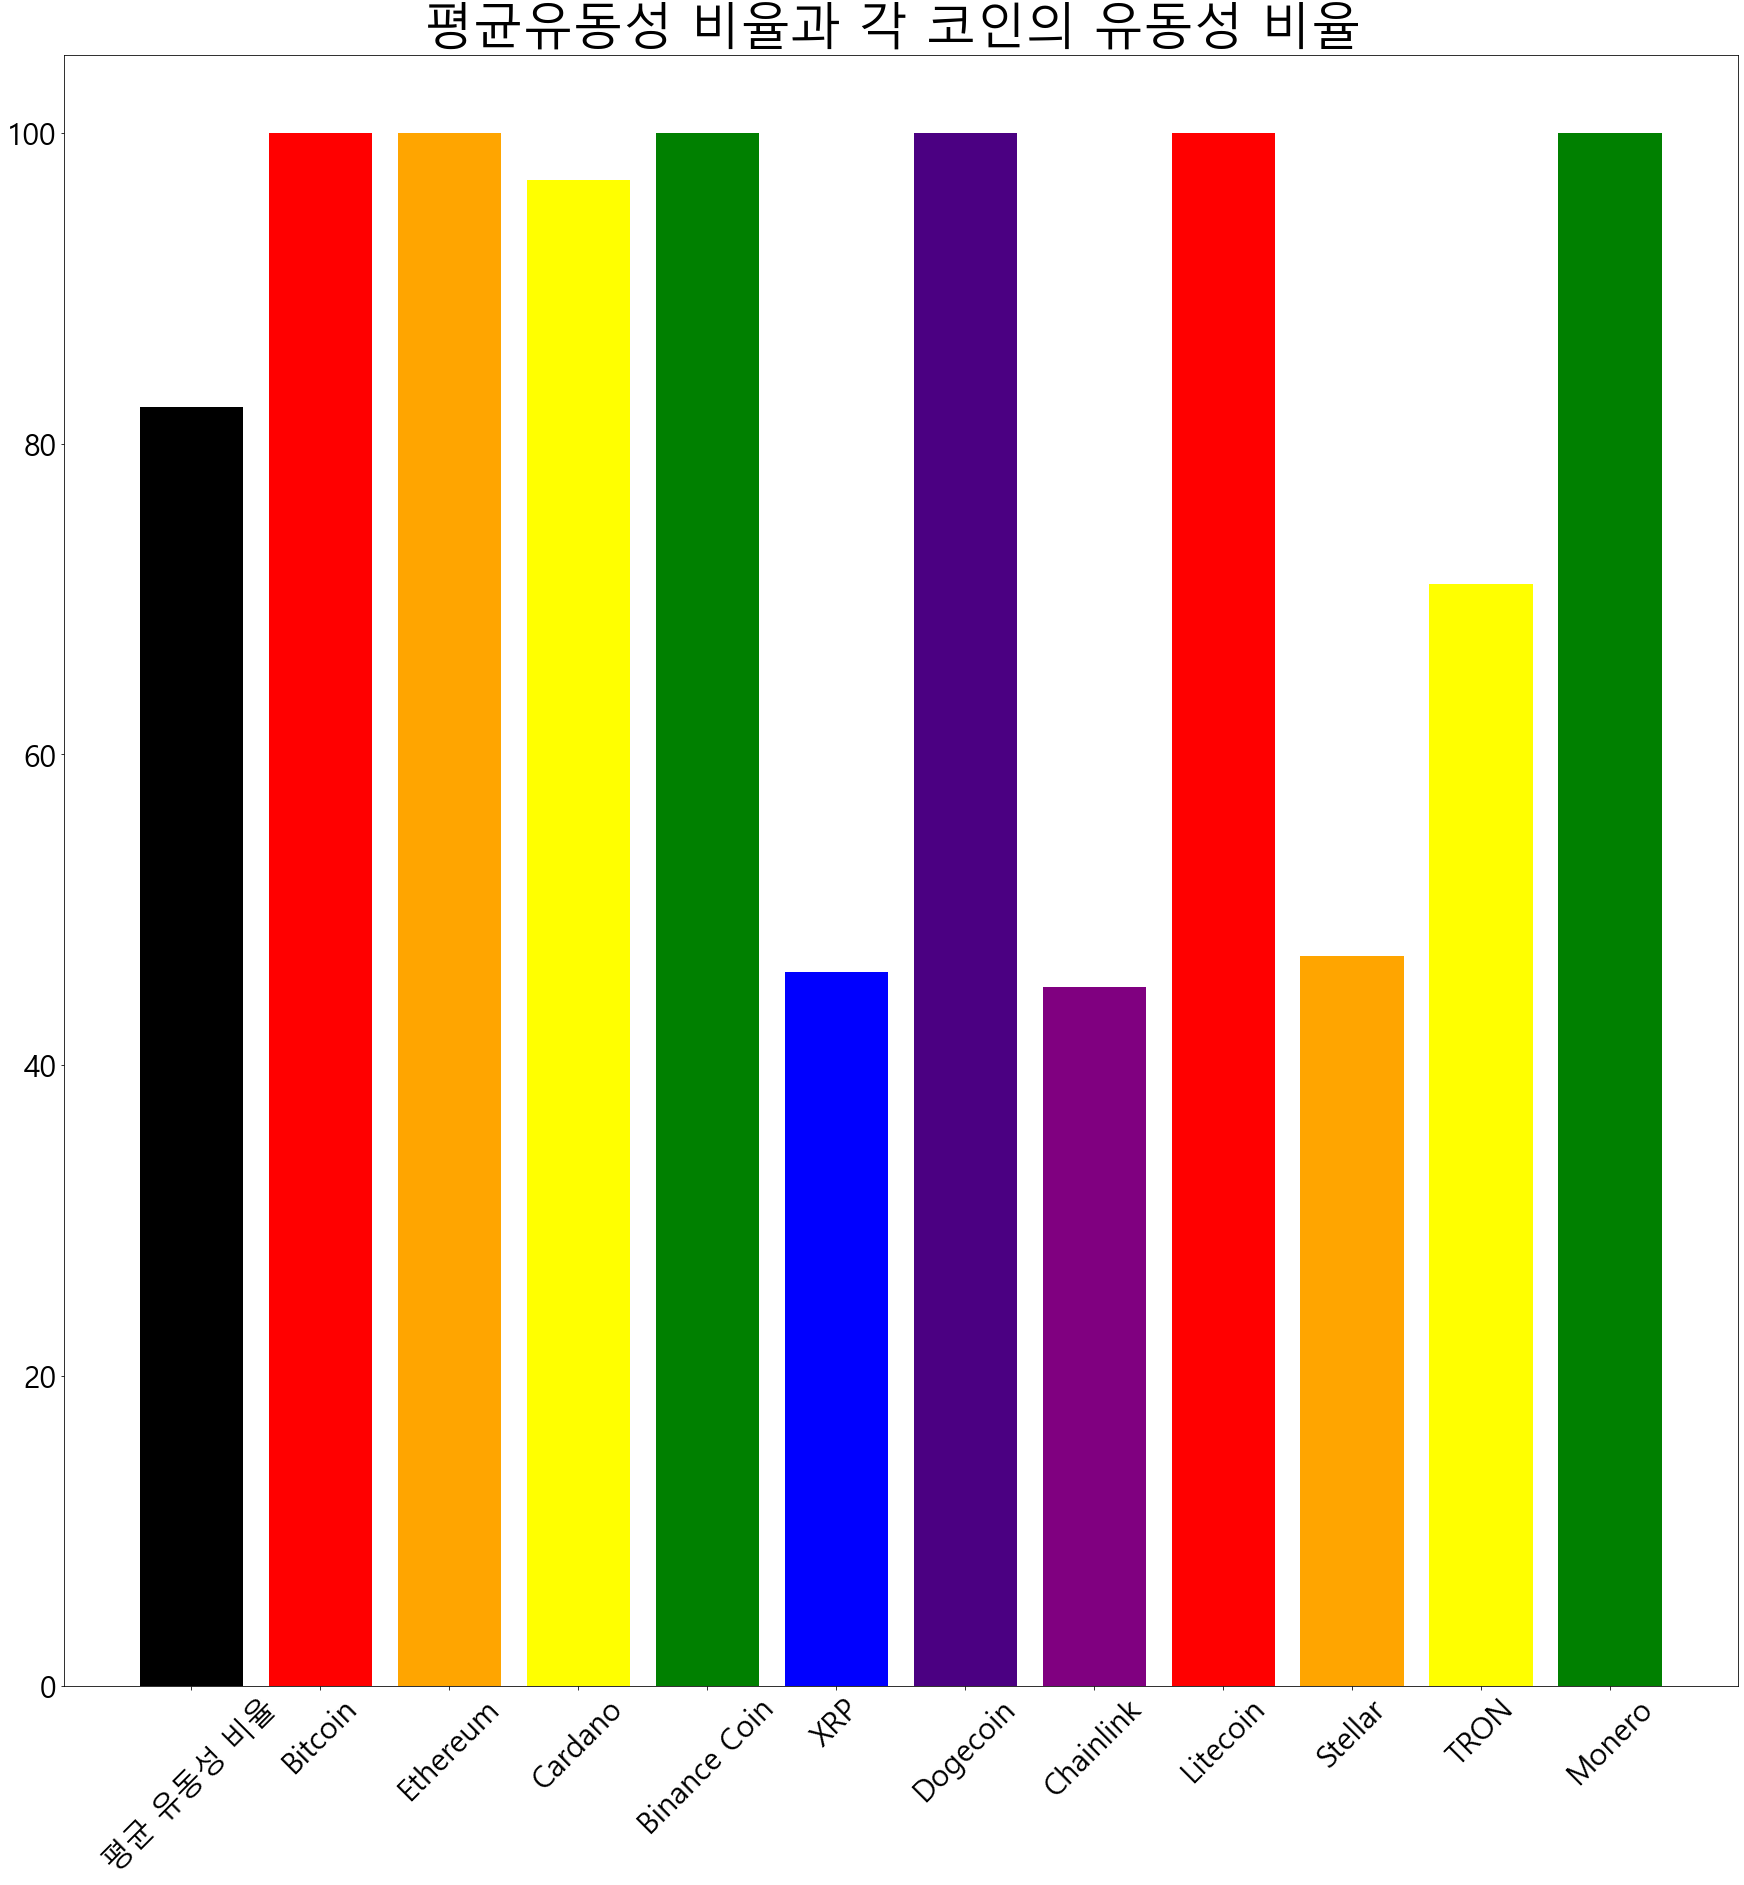

In [510]:
# 4. 활동성 : 최종 선정된 11개 코인(추천투자상품)의 평균 유동성 비율과 각 코인들의 시장에서의 유동성 비율을 비교한 그래프
#           : 대체로 평균이상(100% 근접) 시장에서 활발한 움직임(거래)을 보이고 있고, Xrp,Chainlink,Stellar 3가지 종목만
#           : 평균 이하임과 동시에 50% 미만으로 활발하지 못한 움직임(거래)이 보이고 있습니다. => 3가지 종목의 반 이상의 
#           : 잔여 물량들은 현재 확인이 불가하므로 활동성이 떨어지는것으로 보여지고있다.(나머지 8개종목보다 추천도 낮음) 

x = np.arange(12)
years = df["Coin"].to_list()
years.insert(0,"평균 유동성 비율")

values = [entire,df["Circulating_supply_by_total_supply\n"][0]* 100,
         df["Circulating_supply_by_total_supply\n"][1]* 100,
         df["Circulating_supply_by_total_supply\n"][2]* 100,
         df["Circulating_supply_by_total_supply\n"][3]* 100,
         df["Circulating_supply_by_total_supply\n"][5]* 100,
         df["Circulating_supply_by_total_supply\n"][6]* 100,
         df["Circulating_supply_by_total_supply\n"][11]* 100,
         df["Circulating_supply_by_total_supply\n"][12]* 100,
         df["Circulating_supply_by_total_supply\n"][14]* 100,
         df["Circulating_supply_by_total_supply\n"][16]* 100,
         df["Circulating_supply_by_total_supply\n"][20]* 100]

plt.figure(figsize=(30,30))
plt.title("평균유동성 비율과 각 코인의 유동성 비율 ",fontsize=50)
plt.bar(x, values,color=["black","red","orange","yellow","green","blue","indigo","purple","red","orange","yellow","green"])
plt.xticks(x, years)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.xticks(rotation=45)

plt.show()

In [511]:
# 각 코인별 투자회사명과 회사수
df[["Coin","Invest","invest_number"]]

,Coin,Invest,invest_number
0,Bitcoin,NaN,NaN
1,Ethereum,"Wavemaker Genesis,KR1,Electric Capital,Breyer ...",6.0
2,Cardano,"Wave Financial,Spark Digital Capital,Maven 11,...",7.0
3,Binance Coin,"Venus,币安智能链,Swipe,Bundle,Binance Futures,Numbe...",10.0
5,XRP,"Multiverse,Divergence,Krystal,BENQI,Efinity,Un...",23.0
6,Dogecoin,Auryn Capital,1.0
11,Chainlink,"Chainlink Labs,Arcanum Capital,Koji Capital,Fr...",19.0
12,Litecoin,NaN,NaN
14,Stellar,NaN,NaN
16,TRON,"德邻资本,比特大陆",2.0


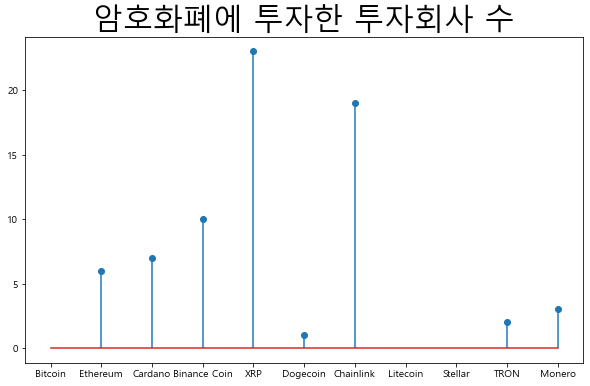

In [512]:
# 2. 성장성, 3. 안정성 => 둘다 쓸 수 있는 내용같아서 적었습니다.
# 선정한 암호화폐 11개의 각 투자한 투자회사들의 수를 시각화 => 각 코인별 투자회사수들을 살펴보면 리플,체인링크,바이낸스코인
# 순으로 투자회사가 많은것으로 나타나고있습니다. 투자회사수가 많다는건 그만큼 많은 회사들의 관심을 가지고 있는 코인으로 보여
# 지고 이는 안정성이 어느정도 보장된다고 예상할 수 있습니다.

plt.title("암호화폐에 투자한 투자회사 수",fontsize=30)
(markerline, stemlines, baseline) = plt.stem(df["Coin"], df["invest_number"])

In [513]:
# 11개 코인별 투자회사 리스트
df[["Invest"]]

,Invest
0,NaN
1,"Wavemaker Genesis,KR1,Electric Capital,Breyer ..."
2,"Wave Financial,Spark Digital Capital,Maven 11,..."
3,"Venus,币安智能链,Swipe,Bundle,Binance Futures,Numbe..."
5,"Multiverse,Divergence,Krystal,BENQI,Efinity,Un..."
6,Auryn Capital
11,"Chainlink Labs,Arcanum Capital,Koji Capital,Fr..."
12,NaN
14,NaN
16,"德邻资本,比特大陆"


In [514]:
# 비트코인의 전체 물량대비 상위33개 기관투자자들의 보유물량 비중
str(df1["# of BTC"].sum() / 21000000 * 100)+'%'

'1.0318704761904762%'

In [515]:
# 상위 10개 기관투자자들의 비트코인 보유개수
df1["# of BTC"].head(10).sum()

205697.0

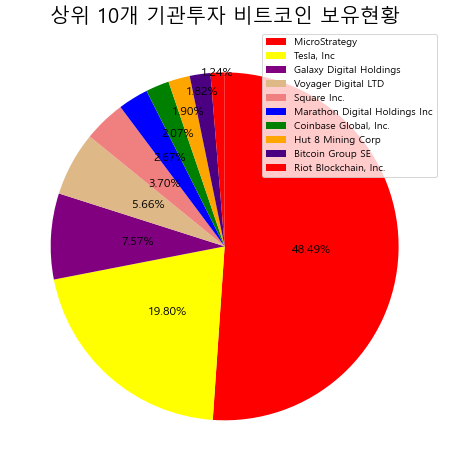

In [516]:
# 2. 성장성, 3. 안정성 => 둘다 쓸 수 있는 내용같아서 적었습니다.
# 상위 10개 기관투자자들의 비트코인 보유현황 시각화 => 이름만 들어도 알 수 있는 거대기관투자자들의 상위 10개 회사들이 보여지
# 고 있습니다. 비트코인이라는 종목이 세계 다양한 거대기관투자자들의 관심과 가치를 인정받고있는것이 보여지고 있습니다.


## 데이터 준비
colors = ['red','yellow','purple','burlywood','lightcoral','blue','green','orange','indigo','red'] ## 색상
labels = df1["Entity"] ## 라벨
frequency = df1["# of BTC"] ## 빈도
 
## 데이터 라벨, 빈도수, 색상을 빈도수를 기준으로 정렬
labels_frequency = zip(labels,frequency,colors) 
labels_frequency = sorted(labels_frequency,key=lambda x: x[1],reverse=True)
 
sorted_labels = [x[0] for x in labels_frequency] ## 정렬된 라벨
sorted_frequency = [x[1] for x in labels_frequency] ## 정렬된 빈도수
sorted_colors = [x[2] for x in labels_frequency] ## 정렬된 색상
 
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(sorted_frequency, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계방향으로 그려짐
       colors = sorted_colors, ## 색상 지정
       )
 
total = np.sum(frequency) ## 빈도수 합
 
threshold = 5
sum_pct = 0 ## 퍼센티지
count_less_5pct = 0 ## 5%보다 작은 라벨의 개수
spacing = 0.1
for i,l in enumerate(sorted_labels):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
    center, r = ax.patches[i].center, ax.patches[i].r ## 파이의 중심 좌표
    
    ## 비율 상한선보다 작은 것들은 계단형태로 만듦
    if sorted_frequency[i]/total*100 < threshold:
        x = (r/2+spacing*count_less_5pct)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2+spacing*count_less_5pct)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
        count_less_5pct += 1
    else:
        x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
    
    ## 퍼센티지 출력
    if i < len(labels) - 1:
        sum_pct += float(f'{sorted_frequency[i]/total*100:.2f}')
        ax.text(x,y,f'{sorted_frequency[i]/total*100:.2f}%',ha='center',va='center',fontsize=12)
    else: ## 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
        ax.text(x,y,f'{100-sum_pct:.2f}%',ha='center',va='center',fontsize=12)

plt.title("상위 10개 기관투자 비트코인 보유현황",fontsize=20)
plt.legend(pie[0],sorted_labels) ## 범례
plt.show()

In [517]:
# 상위 33개 기관투자자들의 비트코인 보유물량
df1["# of BTC"].sum()

216692.8

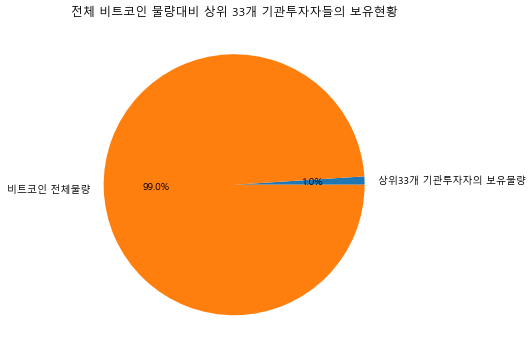

In [518]:
# 3. 안정성 => 둘다 쓸 수 있는 내용같아서 적었습니다.
# 전체 비트코인 물량대비 상위 33개 기관투자자들의 보유현황
# 전 세계 상위 33개 기관투자자들의 전체물량대비 보유현황입니다. => 전체물량의 1%정도 차지하고 있는것으로 보여지고 있습니다.
# 세계에서 큰 규모를 차지하는 기업들의 전체적으로 보았을때는 매우 낮은 비중을 차지하는 것으로 보여지고 있습니다. 그만큼 
# 특정 사람이나 기관이 많은 물량을 보유하고 있을 확률이 매우 낮은것으로 보여지고 있고 이는 암호화폐 대장주 비트코인의 안정성
# 이 갖추어진것으로 보여지고 있습니다.

ratio = [df1["# of BTC"].sum(),21000000]
labels = ["상위33개 기관투자자의 보유물량","비트코인 전체물량"]

plt.title("전체 비트코인 물량대비 상위 33개 기관투자자들의 보유현황")
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()